In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_series_with_dates(y: np.ndarray,
                           start_date: str = "2023-01-01",
                           title: str = "Time Series Plot",
                           ylabel: str = "Value",
                           figsize: tuple = (12, 4)):
    """
    Plot a 1D NumPy array using real dates on the x-axis.

    Parameters
    ----------
    y : np.ndarray
        The data to plot (1D array).
    start_date : str
        Starting date in YYYY-MM-DD format.
    title : str
        Plot title.
    ylabel : str
        Label for the y-axis.
    figsize : tuple
        Figure size.
    """
    # Generate date range matching the length of y
    dates = np.arange(
        np.datetime64(start_date),
        np.datetime64(start_date) + len(y)
    )

    plt.figure(figsize=figsize)
    plt.plot(dates, y, label=title, color="blue")

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()

    # Rotate date labels for readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.09967142 0.13584499 0.25061384 0.45291682 0.47950149 0.50608779
 0.71400907 0.84075255 0.84380511 0.94806111 0.95171934 0.95514637
 1.02934259 0.88801457 0.76552279 0.75929403 0.70801092 0.78943565
 0.74863325 0.65740288]
<class 'numpy.ndarray'>
[10.          9.99851839  9.99407401  9.98666816  9.97630305  9.96298175
  9.9467082   9.92748722  9.90532452  9.88022666  9.85220107  9.82125606
  9.7874008   9.75064532  9.71100052  9.66847814  9.62309077  9.57485188
  9.52377576  9.46987753]
[ 0.00000000e+00  1.56366296e+00  1.94985582e+00  8.67767478e-01
 -8.67767478e-01 -1.94985582e+00 -1.56366296e+00 -4.89858720e-16
  1.56366296e+00  1.94985582e+00  8.67767478e-01 -8.67767478e-01
 -1.94985582e+00 -1.56366296e+00 -9.79717439e-16  1.56366296e+00
  1.94985582e+00  8.67767478e-01 -8.67767478e-01 -1.94985582e+00]


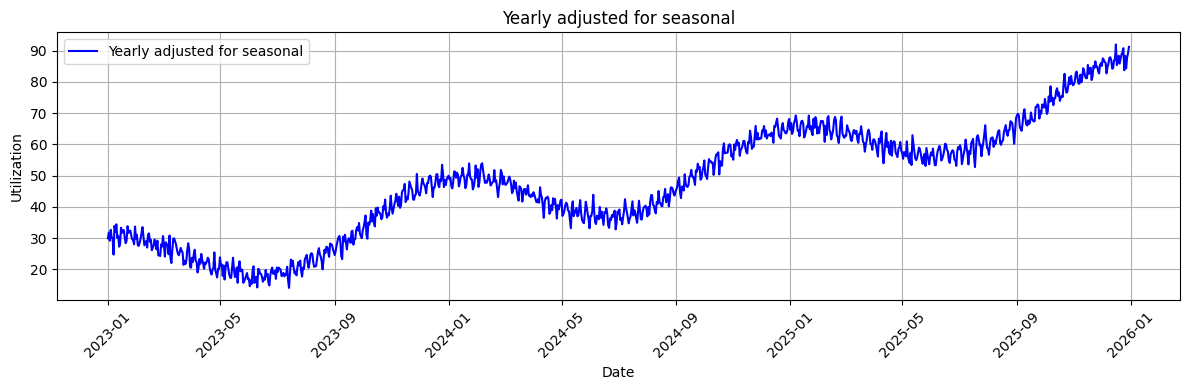

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Setup
days = 1095  # 3 years
t = np.arange(days)
np.random.seed(42)
print(t[:20])
# --- 2. THE MATH COMPONENTS ---

# A. The Trend (Random Walk)
# We pick a small daily growth and use cumsum to build the "path"
daily_steps = np.random.normal(0.05, 0.1, days) 
trend = np.cumsum(daily_steps)
print(trend[:20])


# B. The Seasonality (Sine Waves)
#yearly_season = 10 * np.sin(2 * np.pi * t / 365)
# Change np.sin to np.cos
yearly_season = 10 * np.cos(2 * np.pi * t / 365)

weekly_season = 2 * np.sin(2 * np.pi * t / 7)

print(type(yearly_season))
print(yearly_season[:20])
print(weekly_season[:20])
# C. The Noise (White Noise)
noise = np.random.normal(0, 1.5, days)

# D. The Final Product
base_utilization = 20
total_utilization = base_utilization + trend + yearly_season + weekly_season + noise
total_utilization = np.clip(total_utilization, 0, 100)

# --- 3. VISUALIZATION ---

plot_series_with_dates( y=total_utilization, start_date="2023-01-01", title="Yearly adjusted for seasonal", ylabel="Utilization" )

In [ ]:
plot_series_with_dates( y=yearly_season, start_date="2023-01-01", title="Yearly Seasonal Pattern", ylabel="Seasonal Effect" )

In [ ]:
plot_series_with_dates( y=weekly_season[:21], start_date="2023-01-01", title="weekly Seasonal Pattern", ylabel="Seasonal Effect" )

# 📘 Cell 2 — Plot All Three Weekly Patterns (First 3 Weeks)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Time index (3 years daily) ---
days = 1095
t = np.arange(days)

# --- Base weekly sine wave ---
weekly_sine = 2 * np.sin(2 * np.pi * t / 7)

# --- Weekday index (0 = Sunday, because 2023-01-01 was Sunday) ---
weekday = t % 7

# --- Explicit weekday effects (example pattern) ---
weekday_effect = np.array([
    -1.0,  # Sunday
    -0.5,  # Monday
    0.2,   # Tuesday
    0.5,   # Wednesday
    1.0,   # Thursday
    1.5,   # Friday
    0.8    # Saturday
])

weekly_lookup = weekday_effect[weekday]

# --- Combined pattern (smooth + categorical) ---
weekly_combined = weekly_sine + weekly_lookup

# --- Slice first 3 weeks (21 days) for visualization ---
slice_3w = slice(0, 21)


This cell gives you:

- a pure sine weekly pattern

- a categorical weekday pattern

- a combined realistic weekly pattern

- a 3‑week slice for plotting

In [ ]:
plt.figure(figsize=(14, 6))

# Generate date labels for the first 21 days
dates = np.arange(
    np.datetime64("2023-01-01"),
    np.datetime64("2023-01-01") + 21
)

plt.plot(dates, weekly_sine[slice_3w], label="Smooth Weekly Sine", linewidth=2)
plt.plot(dates, weekly_lookup[slice_3w], label="Weekday Lookup Pattern", linewidth=2)
plt.plot(dates, weekly_combined[slice_3w], label="Combined Pattern", linewidth=3)

plt.title("Weekly Seasonal Patterns (First 3 Weeks)")
plt.xlabel("Date")
plt.ylabel("Seasonal Effect")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# This gives you a beautiful comparison:

- Smooth sine wave (no weekday alignment)

- Categorical weekday bumps (explicit control)

- Combined realistic weekly pattern

All aligned to the real calendar starting on Sunday, 2023‑01‑01.